In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import normalize

In [11]:
df = pd.read_csv(r"C:\Users\visoni\Desktop\bits pilani\MiniProject\AIML_C6_Nov_2021_Data_miniproject.csv")

In [12]:
df.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


In [ ]:
#Lets refine the data : Handle the missing values in each column of the data

In [16]:
print(df.shape)

(159, 6)


In [17]:
df = df.dropna()

In [18]:
print(df.shape)


(157, 6)


In [ ]:
#lets remove rows where one of the column values are not numeric

In [30]:
df = df.apply(lambda x: pd.to_numeric(x, errors = 'coerce')).dropna()

In [31]:
df.shape

(153, 6)

In [32]:
display(df)

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
#Lets find corelation between each features. We can do it by plotting graphs 

In [36]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.915628,0.918600,0.923214,0.724998,0.269239
Weight,0.915628,1.000000,0.999539,0.992358,0.623560,0.238953
Weight1,0.918600,0.999539,1.000000,0.994369,0.638446,0.236757
Length,0.923214,0.992358,0.994369,1.000000,0.699713,0.227335
Height,0.724998,0.623560,0.638446,0.699713,1.000000,0.012800
Width,0.269239,0.238953,0.236757,0.227335,0.012800,1.000000


In [ ]:
#From above matrix it seems that Weight and Weight1 and length are highly co related with each other
#We can confirm by plotting these graphs

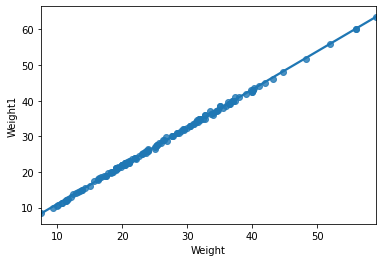

In [38]:
sns.regplot(x=df["Weight"], y=df["Weight1"])

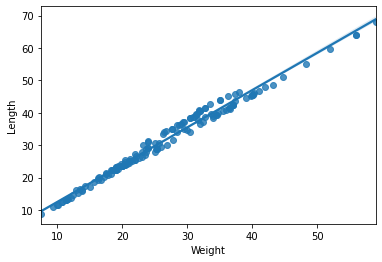

In [39]:
sns.regplot(x=df["Weight"], y=df["Length"])

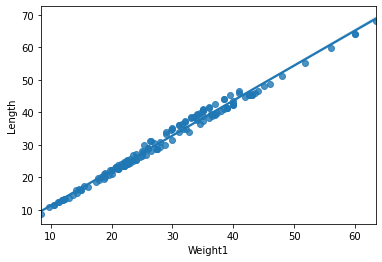

In [41]:
sns.regplot(x=df["Weight1"], y=df["Length"])

In [ ]:
# From above plots it is evident that Weight, Weight1 and Length are highly correlated features.
# We can drop 2 of these features but we will go with all features considerd and see results.

# Detect and Remove outliers 

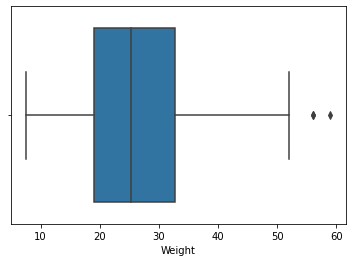

In [60]:
sns.boxplot(df['Weight']) #we find there are outlier in Weight

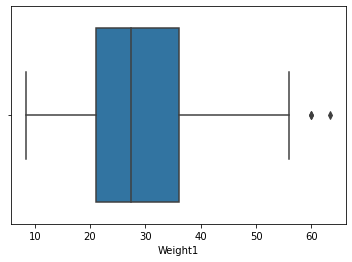

In [86]:
sns.boxplot(df['Weight1']) #We find there is one outlier in Weight1

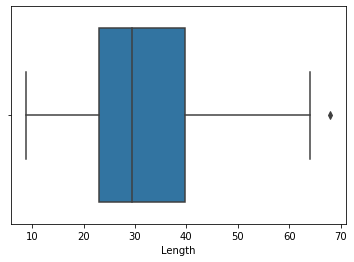

In [87]:
sns.boxplot(df['Length']) #We find there is one outlier in Length

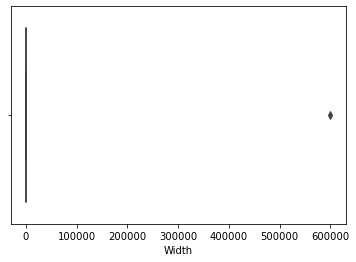

In [61]:
sns.boxplot(df['Width']) #We find there is one outlier in Width

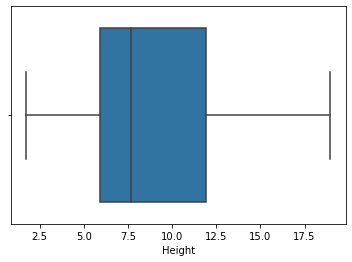

In [67]:
sns.boxplot(df['Height']) #We find there is no outlier in Height

In [88]:
z = np.abs(stats.zscore(df['Weight']))
threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([139], dtype=int64),)


In [89]:
z = np.abs(stats.zscore(df['Weight1']))
threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([139], dtype=int64),)


In [90]:
z = np.abs(stats.zscore(df['Length']))
threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([139], dtype=int64),)


In [69]:
z = np.abs(stats.zscore(df['Width']))
threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([137], dtype=int64),)


In [76]:
new_df_all_features = df.drop([df.index[137],df.index[139]])
# new_df will be data frame after removing outliers

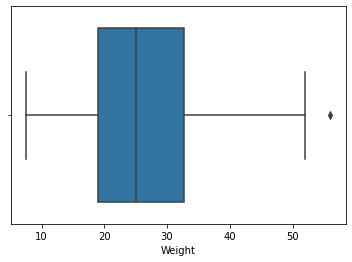

In [77]:
sns.boxplot(new_df['Weight'])  #After removing outlier

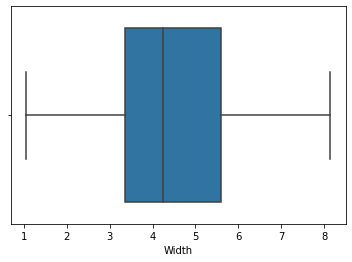

In [78]:
sns.boxplot(new_df['Width'])  #After removing outlier

# Remove Weight1 and Length column from data frame
# Wight , Weight1 and Length are highly corelated
# We will keep only Weight column for our model

In [82]:
new_df.drop('Weight1', inplace=True , axis=1)

In [83]:
new_df.drop('Length', inplace=True , axis=1)

In [85]:
new_df.head()

,Cost,Weight,Height,Width
0,242.0,23.2,11.5200,4.0200
1,290.0,24.0,12.4800,4.3056
2,340.0,23.9,12.3778,4.6961
3,363.0,26.3,12.7300,4.4555
4,430.0,26.5,12.4440,5.1340


# Model building using OLS approach in sklearn (date frame used is new_df)

In [144]:
x = new_df[['Weight', 'Height' , 'Width']]
y = new_df['Cost']

In [97]:
regr = linear_model.LinearRegression()  #create instance of Linear regression
regr.fit(x, y) #fit model using given set of data

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -485.76116638825624
Coefficients: 
 [ 0.         17.85891788 15.47719226 61.1894641 ]


In [102]:
import math
y_predicted = regr.predict(x) #Predict cost of bag using above model 

mse = mean_squared_error(y, y_predicted)
rmse = math.sqrt(mse)
r2 = r2_score(y, y_predicted)

In [106]:
print("Mean squared error for OLS approach is {}".format(mse))
print("Root mean squared error for OLS approach is {}".format(rmse))
print("R2 value for OLS approach is {}".format(r2))


Mean squared error for OLS approach is 12703.726821781987
Root mean squared error for OLS approach is 112.71081058080448
R2 value for OLS approach is 0.8867032207290749


# Model building using gradient discent algorithm

In [113]:
theta = np.random.rand(4)
alpha = 0.001
m = y.size

In [120]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [121]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

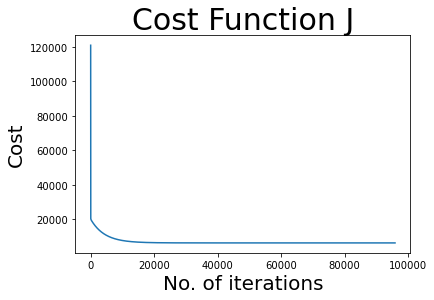

In [122]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [126]:
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent
RMSE_GD = math.sqrt(MSE_GD)
r2_GD = r2_score(y, prediction_list[-1])
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))
print('Root Mean Square Error from Gradient Descent prediction : {}'.format(round(RMSE_GD,3)))
print('R2 from Gradient Descent prediction : {}'.format(round(r2_GD,3)))

Mean Square Error from Gradient Descent prediction : 12703.727
Root Mean Square Error from Gradient Descent prediction : 112.711
R2 from Gradient Descent prediction : 0.887


# Model building using Mini batch gradient

In [145]:
mb_learning_rate = 0.001
mb_max_iteration = 500
batch_size = 16

In [178]:
data = new_df.to_numpy()  #convert data frame into numpy array
data.shape
data = normalize(data, axis=0)
x = data[:, 1:4]   #Weight, Lenght and Width goes into Feature set
y = data[:, 0:1]

In [179]:
mb_theta = np.zeros((data.shape[1], 1))

In [200]:
def h (theta, x) :  #design hypotheisis
  tempX = np.ones((x.shape[0], x.shape[1] + 1))
  tempX[:,1:] = x
  return np.matmul(tempX, theta)

In [201]:
def loss (theta, x, y) :   #define loss function
  return np.average(np.square(y - h(theta, x))) / 2

In [202]:
def gradient (theta, x, y) :
  tempX = np.ones((x.shape[0], x.shape[1] + 1))
  tempX[:,1:] = x
  d_theta = - np.average((y - h(theta, x)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

In [203]:
def minibatch_gradient_descent (theta, x, y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, x.shape[0], batch_size):
      d_theta = gradient (theta, x[j:j+batch_size,:], y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, x, y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, x, y)) 
  return theta, cost

In [204]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, x, y, mb_learning_rate, mb_max_iteration, batch_size, 100)
# train model

iteration :  0  loss :  0.0032749471709937555
iteration :  100  loss :  0.0016956440508952033
iteration :  200  loss :  0.0014555747267704167
iteration :  300  loss :  0.0014088418660730823
iteration :  400  loss :  0.0013939131373828474


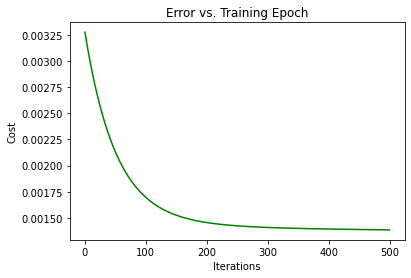

In [207]:
fig, ax = plt.subplots() 
ax.plot(np.arange(mb_max_iteration), mb_cost, 'g') 
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

In [208]:
print(mb_theta)  #Optimal values of paramaters

[[0.05552158]
 [0.01102701]
 [0.0115114 ]
 [0.01140671]]


# Model building using Stochastic gradient

In [211]:
#We have already defined data array, hypothesis function and gradient functions above 
s_theta = np.zeros((data.shape[1], 1))
s_learning_rate = 0.001
s_max_iteration = 500

def stochastic_gradient_descent (theta, x, y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(x.shape[0]):
      d_theta = gradient (theta, x[j,:].reshape(1, x.shape[1]), y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, x, y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, x, y)) 
  return theta, cost

In [212]:
s_theta, s_cost = stochastic_gradient_descent (s_theta, x, y, s_learning_rate, s_max_iteration, 100)

iteration :  0  loss :  0.002807372611119531
iteration :  100  loss :  0.001323943731510919
iteration :  200  loss :  0.00124645202009983
iteration :  300  loss :  0.0011743128375786937
iteration :  400  loss :  0.0011071544679507285


In [213]:
print(s_theta) #Optimal values of paramaters

[[0.03926283]
 [0.09616766]
 [0.10173735]
 [0.09984378]]


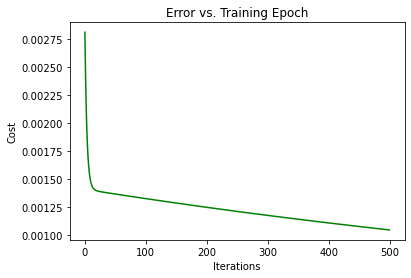

In [214]:
fig, ax = plt.subplots() 
ax.plot(np.arange(s_max_iteration), s_cost, 'g') 
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

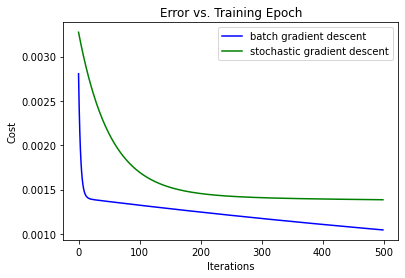

In [217]:
#plot the cost
fig, ax = plt.subplots()  
  
ax.plot(np.arange(500), s_cost, 'b')  
ax.plot(np.arange(500), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()